In this notebook, we do visual inspection to create a training set for our CNN shred classifier!

In [15]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from astropy.io import fits
from astropy.table import Table
import numpy as np


Load the dataset!

We create a copy of this dataset with only a few columns to avoid over-writing on the original dataset!

The only columns we need are RA, DEC, TARGETID, SAMPLE, IMAGE_PATH, FILE_PATH and we will add a column for our labelling!

In [2]:
# shreds_all = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_catalog_v3.fits")
# shreds_all = shreds_all["TARGETID","RA","DEC","FILE_PATH","IMAGE_PATH"]

# ##save this folder and we will be updating for this for visual inspection stuff!
# all_img_paths = []
# for i in range(len(shreds_all)):
#     all_img_paths.append( shreds_all["FILE_PATH"][i] + "/grz_bands_segments.png")

# shreds_all["PNG_PATH"] = all_img_paths

# shreds_all.write("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_VI.fits",overwrite=True)

In [3]:
# ## read the VI catalog 
# data = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_VI.fits")

# np.random.seed(42)

# #can we scrambe these row
# shuffled_indices = np.random.permutation(len(data))
# data_shuffled = data[shuffled_indices]

# data_shuffled.write("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/desi_y1_dwarf_shreds_VI_labelled.fits",overwrite=True)



In [4]:
# temp = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_SGA_sga_catalog_w_aper_mags.fits")
# temp = temp[670:]
# # near_sga = temp[(temp["Z"] > 0.005) & (temp["Z"] < 0.01)]
# # near_sga.write("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/sga_other_very_near.fits")

# near_sga = temp[(temp["Z"] > 0.005) & (temp["Z"] < 0.01) & (temp["DEBLEND_SMOOTH_NUM_BLOB"] > 1)]
# # 
# near_sga.write("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/sga_other_very_near_more_blobs.fits")


In [5]:
# temp = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_BGS_BRIGHT_shreds_catalog_w_aper_mags.fits")
# near_bgsb = temp[(temp["Z"] > 0.005) & (temp["Z"] < 0.01) & (temp["DEBLEND_SMOOTH_NUM_BLOB"] > 1)]
# near_bgsb.write("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/bgsb_other_very_near_more_blobs.fits")


In [20]:
temp = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_SGA_sga_catalog_w_aper_mags.fits")
near_bgsb = temp[(temp["Z"] > 0.005) & (temp["Z"] < 0.1) & (temp["DEBLEND_SMOOTH_NUM_BLOB"] > 1)]
near_bgsb.write("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/deblend_num_VI/sga_more_blobs.fits",overwrite=True)
print(len(near_bgsb))

311


In [33]:
near_bgsb[near_bgsb["TARGETID"] == 39627975099944371]["Z"]

<Column name='Z' dtype='float64' length=0>

In [21]:
data = Table.read("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/deblend_num_VI/sga_more_blobs.fits")

# Keep only scalar columns
for colname in list(data.colnames):
    if len(data[colname].shape) > 1:
        data.remove_column(colname)


In [38]:
temp[temp["TARGETID"] == 39627719104793033]["FILE_PATH","Z"]

FILE_PATH,Z
bytes116,float64
/pscratch/sd/v/virajvm/redo_photometry_plots/all_sga/south/sweep-040m005-050p000/0486m027/SGA_tgid_39627719104793033,0.00604595704492207


In [22]:

#converting the data to pandas df
df = data.to_pandas()

In [23]:
# df["IS_SHRED_VI"] == b'nan'

In [24]:
# save_path = "/pscratch/sd/v/virajvm/trash/nsa_bias_paper/near_deblend_cat_VI_labelled.fits"
# save_path = "/pscratch/sd/v/virajvm/trash/nsa_bias_paper/sga_other_very_near_labelled.fits"
# save_path = "/pscratch/sd/v/virajvm/trash/nsa_bias_paper/bgsb_other_very_near_more_blobs_labelled.fits"
# save_path = "/pscratch/sd/v/virajvm/trash/nsa_bias_paper/elg_other_very_near_more_blobs_labelled.fits"
save_path = "/pscratch/sd/v/virajvm/trash/nsa_bias_paper/deblend_num_VI/sga_more_blobs_labelled.fits"



In [25]:
# # # === Add 'label' column if not present ===
if "IS_SHRED_VI" not in df.columns:
    df["IS_SHRED_VI"] = b"nan"

In [26]:

# === Set start index ===
# index = df[df["IS_SHRED_VI"] == ""].index.min()

# if pd.isna(index):
#     index = 0

# Identify rows that are unprocessed: NaN or empty byte string
# unprocessed = df[df["IS_SHRED_VI"].isna() | (df["IS_SHRED_VI"] == b'')]
# # Get the first index of unprocessed row
# index = unprocessed.index.min()

index = df[df["IS_SHRED_VI"] == b'nan'].index.min()

print(index)

# === Display setup ===
image_widget = widgets.Output()
label_widget = widgets.Label()
next_button = widgets.Button(description="Next")
prev_button = widgets.Button(description="Prev")
shred_button = widgets.Button(description="Over Deblend")
good_button = widgets.Button(description="Correct Deblend")
ambi_button = widgets.Button(description="Ambiguous Deblend")

# === Save back to FITS ===
def save_fits():
    df_to_save = df.copy()

    # Ensure all object-type columns (usually strings) are cast to fixed-length strings
    for col in df_to_save.select_dtypes(include='object').columns:
        maxlen = df_to_save[col].astype(str).str.len().max()
        df_to_save[col] = df_to_save[col].astype(f'S{maxlen}')

    hdu = fits.BinTableHDU.from_columns(fits.ColDefs(df_to_save.to_records(index=False)))
    hdu.writeto(save_path, overwrite=True)

# === Save label ===
def save_label(label):
    global index
    df.at[index, "IS_SHRED_VI"] = label
    save_fits()

# === Display image ===
def resize_image_maintain_aspect(image, target_size=1024):
    # Get original dimensions
    width, height = image.size
    
    # Calculate the scaling factor to preserve the aspect ratio
    scaling_factor = target_size / max(width, height)
    
    # Compute the new width and height
    new_width = int(width * scaling_factor)
    new_height = int(height * scaling_factor)
    
    # Resize the image (this won't distort it)
    resized_img = image.resize((new_width, new_height))

    return resized_img


def show_image():
    image_widget.clear_output(wait=True)
    
    title = df.iloc[index]['FILE_PATH']
    if isinstance(title, bytes):
        title = title.decode("utf-8")
    title = title.replace("/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/","")
    label_widget.value = f"{index + 1}/{len(df)}: {title}"

    with image_widget:
        try:
            file_path = df.iloc[index]["FILE_PATH"]
            if isinstance(file_path, bytes):
                file_path = file_path.decode("utf-8")
            file_path = file_path + "/parent_isolate_VI.png"

            img = Image.open(file_path)

            # Get image dimensions
            width, height = img.size

            # Crop to the top half (left, upper, right, lower)
            # img = img.crop((0, 0, width, height // 2))

            # Optionally resize while preserving aspect ratio
            img = resize_image_maintain_aspect(img)

            plt.figure(figsize=(10, 10))
            plt.imshow(img)
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"Could not load image: {e}")
            
# def show_image():
#     image_widget.clear_output(wait=True)
    
#     title = str(df.iloc[index]['FILE_PATH'])
#     title = title.replace("/pscratch/sd/v/virajvm/redo_photometry_plots/all_deshreds/","")
#     label_widget.value = f"{index + 1}/{len(df)}: {title}"
#     with image_widget:
#         try:
#             file_path = df.iloc[index]["FILE_PATH"].decode("utf-8") + "/jaccard_smoothing_nlevel_4.png"
#             img = Image.open(file_path)
#             # img = img.resize((256, 256))
#             plt.figure(figsize = (10,10))
#             img = resize_image_maintain_aspect(img)
#             plt.imshow(img)
#             plt.axis("off")
#             plt.show()
#         except Exception as e:
#             print(f"Could not load image: {e}")

# === Button Callbacks ===
def on_next(b): 
    global index
    if index < len(df) - 1:
        index += 1
        show_image()

def on_prev(b):
    global index
    if index > 0:
        index -= 1
        show_image()

def on_shred(b):
    save_label("over_deblend")
    on_next(b)

def on_good(b):
    save_label("correct_deblend")
    on_next(b)

def on_ambi(b):
    save_label("ambi")
    on_next(b)

# === Wire Buttons ===
next_button.on_click(on_next)
prev_button.on_click(on_prev)
shred_button.on_click(on_shred)
good_button.on_click(on_good)
ambi_button.on_click(on_ambi)



0


In [27]:
# === Layout ===
buttons = widgets.HBox([prev_button, next_button, good_button, shred_button, ambi_button])
display(label_widget, image_widget, buttons)

# === Start ===
show_image()

Label(value='')

Output()

In [151]:
##if there are multiple segments deptected, that is suspicious ... 

In [ ]:
#In parent galaxy no isolte mask, we are masking everything else? are we masking other segments detected?
#test eg: 39627719104793033, 39627788461805967

#39627832569104126 -> what is pcnn value?


FINAL ROUND V1:

ambi: 
39627362790284840, 39627616545671238, 39627630286211900, 39627679732862962, 39627779272087690
39627836750824798, 39627869676112539, 39627903159242751, 39627943651055613, 39628001326928392
39628006855017657, 39628059313177021, 39628096717983805, 39628262262969837, 39633489556931574

39633458183540035, 39628120273193803 -> tricky

good examples:
39627809970194315,39627928937435852 , 39628298988292113, 39633000891157689, 39627527219582567, 39627637500412066
39627695146931165, 39627703095132317, 39627737203215046(!!), 39627999485624747, 39628190250962169 (but not correct split)
39628341396898666, 39628462352239336(!!), 39633489556931574(!!)


bad:
39627738985794993, 39627930246058449, 39628217295837375, 39628287676255394, 39627631133459489, 39627764336165993
39627655573673807, 39627670966765053, 39627697114058718, 39627697529294415, 39627736733457794, 39627738985794919
39627764336168155, 39627821529697854, 39627826311201348, 39627842522186025, 39627876038876324, 39627938823407009
39627947035853189, 39628005500260460, 39628037058201121, 39628055710271155, 39628176778858336, 39628251634605301
39628287110025113, 39628302587007883, 39628307825691449, 39628176778858306, 39632970251766642, 39627968951091256

overshred:
39627444558238904, 

bad_source:
39627809970194315

bad tractor model:
39627717540316542, 39627806069493510, 39627902874027378, 39628024596922695, 39628199780419265
https://www.legacysurvey.org/viewer/?ra=315.2941&dec=-2.9625&layer=ls-dr9-model&zoom=16&mark=315.296138,-2.962615


multiple sources but not all being separated: 
39628286740928450, 39628293305011260, 39627561638039533

why star not being blockeed:
39627681280565072(BGSB), 

In [ ]:
SGA_tgid_39627977893351426, 39628218696731492, 39628285465856538 -> ambi

39627730970483257 > works well at 0.0206 and 21.59

39632941042633159 -> but also do not want to apply 21.17 0.0084
39628007089901332 -> do want the isolate to be applied (0.00084, 21.15)
39627986659446615 -> do not want the isolate to be applied!! (0.0065, 21.20)

working well!
39627639891166821, 
39627719104793033, 39627660439064482, 39627636904822110 (low-z and too faint :( ) (but likely not going to pass the cut)
39627624837811771


bad SGA:
39632970251766642, 39633109322303901, 39633489556931574, 39633507017820464, 39627351130112476?, 39627876038876324
39627947035853189
                                                         
lot being masked: 39628183988863007?? seems like one of the bright stars??? why ..

39633021107703301 -> how to identify such stars?


39633478974704305, 39633478974704360 -> can this be identified as sus? Has some faulty pixels !


39633458137402166 -> interesting case of here visually these appear to be dwarfs, but with DESI redshift we see that they
are at very different redshifts!

A potentially improvement could be to in the final stage, to work in the tractor space and not in the iamge space!!
Could test this!!



In [53]:
39627794543543454 -> a merger potentially between two
https://www.legacysurvey.org/viewer?ra=226.5412&dec=39.1792&layer=ls-dr10&zoom=16 -> example of source where tractor
says is PSF but is not ... 
39633196354112253, 39633148518073943, 39632976127986972, 39627727711507922, 39627748016133415 -> ambi

39627754362113195 => likey correct vbu still ambi
587/1440: south/sweep-140p000-150p005/1400p032/BGS_BRIGHT_tgid_39627865590862285
539/1440: south/sweep-200p000-210p005/2003p017/BGS_BRIGHT_tgid_39627830367096528
671/1440: south/sweep-330p005-340p010/3367p057/BGS_BRIGHT_tgid_39627929134565710
37/454: south/sweep-320p005-330p010/3249p090/BGS_BRIGHT_tgid_39628006855017657
62/454: south/sweep-250p010-260p015/2587p112/BGS_BRIGHT_tgid_39628059313177021
161/454: south/sweep-240p020-250p025/2466p242/BGS_BRIGHT_tgid_39628357943431043
175/454: south/sweep-020p025-030p030/0207p265/BGS_BRIGHT_tgid_39628403724257757

39628120273193803, 39627731113090233, 39627829683426278 > tough one to do correct hehe 

I probably should not block all PSF type objects ...

289/1440: south/sweep-060m010-070m005/0611m080/BGS_BRIGHT_tgid_39627592982070138 -> why is red not blocked?

440/1440: south/sweep-310m005-320p000/3141m017/BGS_BRIGHT_tgid_39627747718338407-> why star not block?
49/1440: south/sweep-310m005-320p000/3131m015/BGS_BRIGHT_tgid_39627753741357390 -> why star not block?

#in geenral should we mask pixels that have very negative values? 56/1440: south/sweep-170m005-180p000/1708m012/BGS_BRIGHT_tgid_39627757394595015

160/454: south/sweep-120p020-130p025/1298p242/BGS_BRIGHT_tgid_39628356152461969 -> ambi

186/454: south/sweep-350p025-360p030/3567p272/BGS_BRIGHT_tgid_39628424955824846 -> example of it working well

628/1440: south/sweep-230p000-240p005/2377p045/BGS_BRIGHT_tgid_39627897379491294-> what is PCNN here? Can we identify such objects with bad backgrounds?
666/1440: south/sweep-130p005-140p010/1339p057/BGS_BRIGHT_tgid_39627925745566685 -> how to remove such objects?


SyntaxError: invalid syntax (1978844817.py, line 1)

In [131]:
temp = Table.read("/pscratch/sd/v/virajvm/trash/nsa_bias_paper/deblend_more_cat_VI_labelled.fit")

In [141]:

mask = (temp["IS_SHRED_VI"].data != b'nan') #& (temp["IS_SHRED_VI"].data != b'ambi')

In [142]:
temp_v2 = temp[mask]

In [143]:
len(temp_v2)

678

In [135]:
over_deblend = np.zeros(len(temp_v2))
over_deblend[ temp_v2["IS_SHRED_VI"] == b"over_deblend" ] = 1

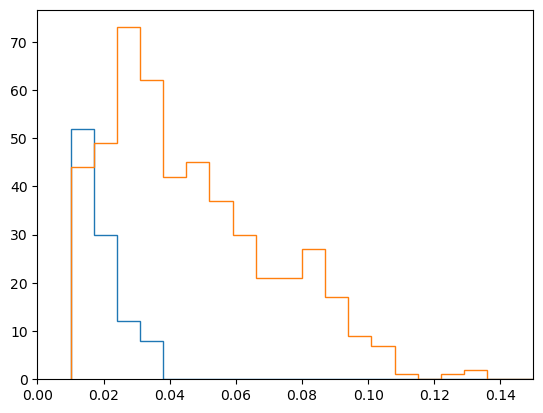

In [136]:
plt.hist(temp_v2[temp_v2["IS_SHRED_VI"] == b"over_deblend"]["Z"],range=(0.01,0.15),histtype = "step",bins=20)
plt.hist(temp_v2[temp_v2["IS_SHRED_VI"] != b"over_deblend"]["Z"], range= (0.01,0.15),histtype = "step",bins=20)
plt.xlim([0,0.15])
plt.show()

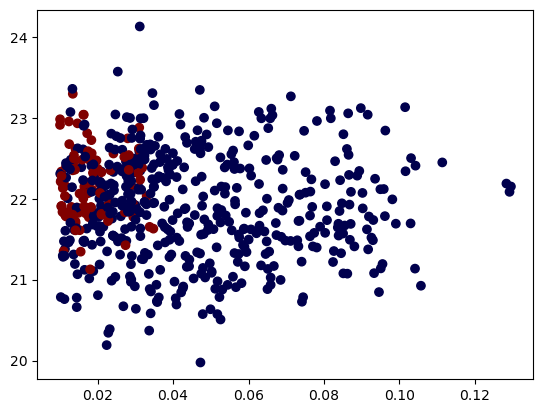

In [137]:
plt.scatter(temp_v2["Z"].data, temp_v2["APER_R2_MU_R_SMOOTH"].data , c= over_deblend,cmap = "seismic",vmin=0,vmax=1 )

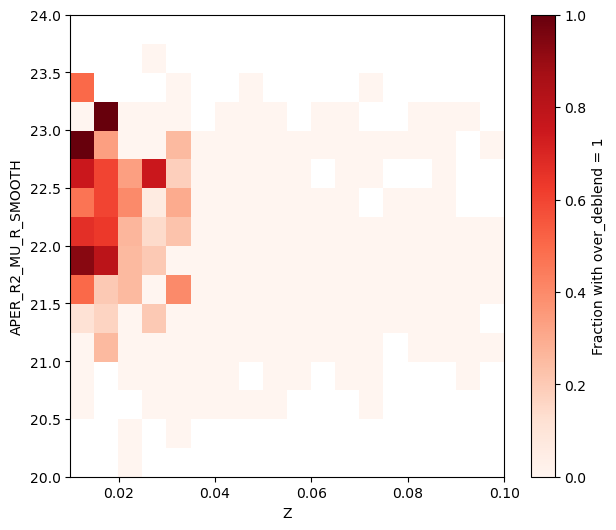

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

x = temp_v2["Z"].data
y = temp_v2["APER_R2_MU_R_SMOOTH"].data
z = over_deblend  # 0 or 1

# Fraction in each bin = mean of z (since it's 0/1)
stat, xedges, yedges, binnumber = binned_statistic_2d(
    x, y, z, statistic="mean", bins=[2*9, 2*8], range=[[0.01, 0.1], [20,24]]  # adjust bin numbers as needed
)

plt.figure(figsize=(7,6))
plt.imshow(
    stat.T, origin="lower",
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect="auto", cmap="Reds", vmin=0, vmax=1
)
plt.colorbar(label="Fraction with over_deblend = 1")
plt.xlabel("Z")

plt.ylabel("APER_R2_MU_R_SMOOTH")
plt.show()
